# _**TAREA I - SERIES DE TIEMPO**_

Bastian Araya
Franco Gonzales
Daniela Díaz

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib as mp
import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.optimize as so


## Problema 2

### Analice, compare y comente la serie *accidental deaths* de USA con la serie *sinestrialidad* en Chile

- Importación de las bases de datos

In [2]:
sinestrialidad= pd.read_csv('evolucionChile.csv',decimal=',',thousands='.')
sinestrialidad.head()

,Año,Siniestros,Fallecidos,Lesionados_graves,Lesionados_menos_graves,Lesionados_leves,Total_lesionados,Total_víctimas,Tasa_motorización,Vehículos_cada_100_habitantes,Parque_vehicular,Población,Indicadores_cada_10000_vehículos_Siniestralidad,Indicadores_cada_10000_vehículos_Mortalidad,Indicadores_cada_10000_vehículos_Morbilidad,Indicadores_cada_100000_habitantes_Siniestralidad,Indicadores_cada_100000_habitantes_Mortalidad,Indicadores_cada_100000_habitantes_Morbilidad,Fallecidos_cada_100_siniestros,Siniestros_por_cada_fallecido
0,1972,26727,1792,6590,5624,11027,23241,25033,24.7,4.0,401114,9907065,666.32,44.68,579.41,269.78,18.09,234.59,6.70,14.91
1,1973,23480,1719,6020,5153,10079,21252,22971,24.1,4.1,417767,10075782,562.04,41.15,508.70,233.03,17.06,210.92,7.32,13.66
2,1974,18356,1269,4935,3763,7938,16636,17905,23.8,4.2,431172,10244501,425.72,29.43,385.83,179.18,12.39,162.39,6.91,14.46
3,1975,16602,1054,4208,3479,7142,14829,15883,23.4,4.3,445693,10413219,372.50,23.65,332.72,159.43,10.12,142.41,6.35,15.75
4,1976,17716,1079,4322,3456,7355,15133,16212,22.7,4.4,466049,10565409,380.13,23.15,324.71,167.68,10.21,143.23,6.09,16.42


In [3]:
accidental_deaths=pd.read_csv('deaths.txt',delim_whitespace=True)
accidental_deaths.head()
#necesitamos hacer una limpieza de los datos para tenerlos como tipo de dato datetime

,Mont,Year,accidental_deaths
0,1,1973,9007
1,2,1973,8106
2,3,1973,8928
3,4,1973,9137
4,5,1973,10017


In [4]:
df=pd.DataFrame({'year':accidental_deaths['Year'].tolist(),
               'month':accidental_deaths['Mont'].tolist(),
                'day': [1]*len(accidental_deaths['Mont'].tolist())}) #se agrega el 1 como fecha referencial, no influye en nada
accidental_deaths['date']=pd.to_datetime(df)
accidental_deaths=accidental_deaths.drop(['Mont','Year'],axis=1)
accidental_deaths.head()

,accidental_deaths,date
0,9007,1973-01-01
1,8106,1973-02-01
2,8928,1973-03-01
3,9137,1973-04-01
4,10017,1973-05-01


### Creación de graficos

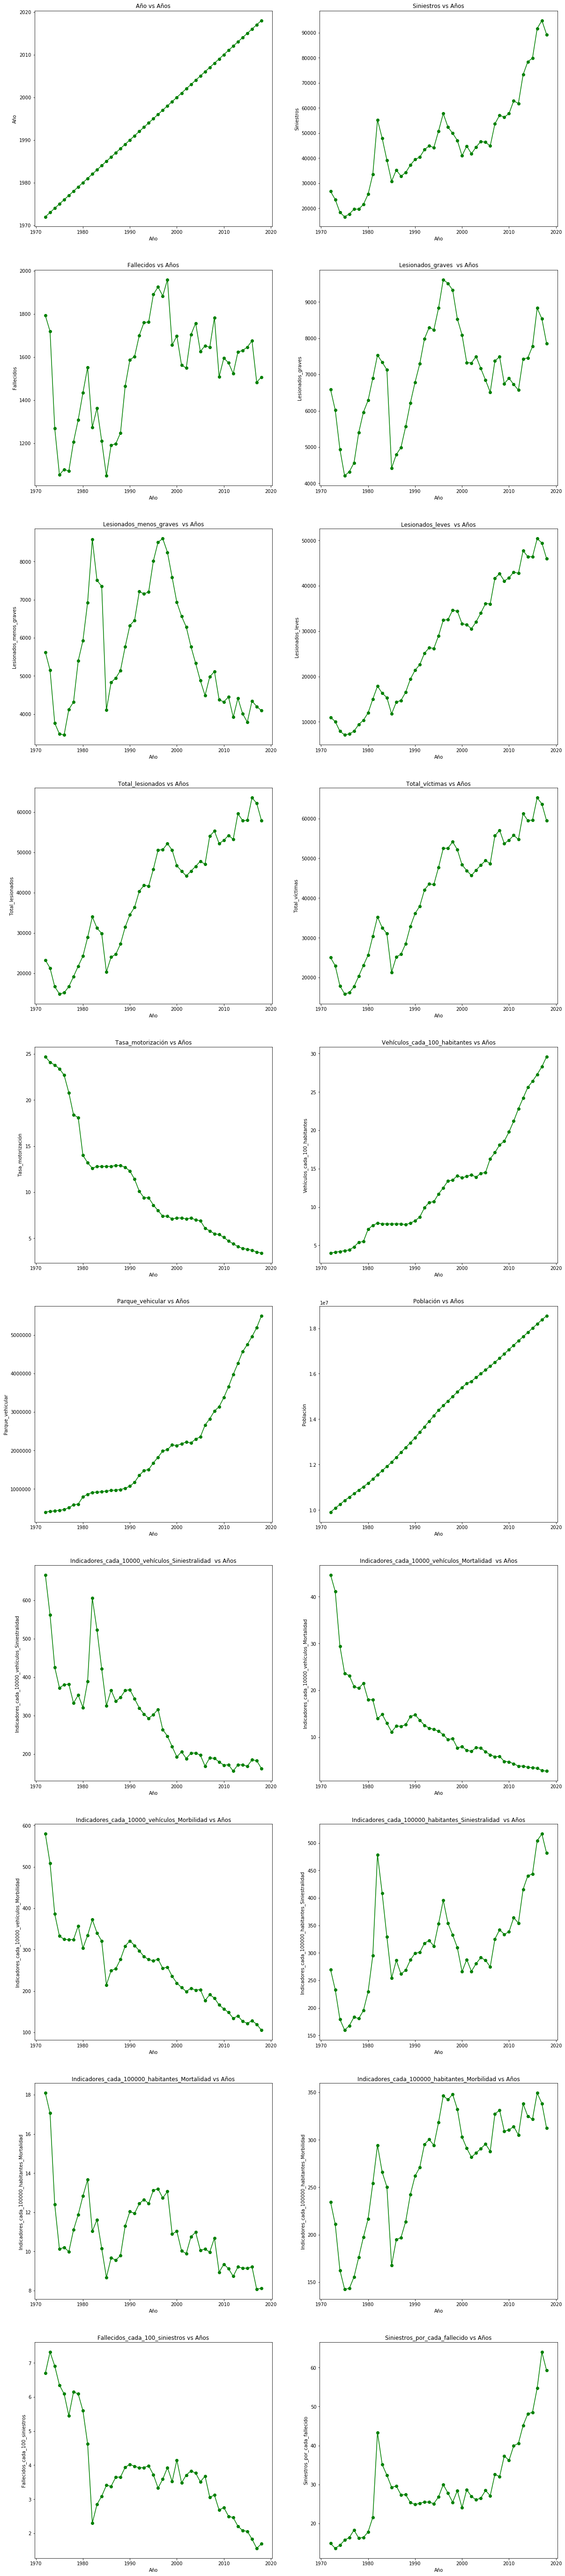

In [5]:
#En este programa se graficara cada grafico columna vs año, incluyendo el año vs año solo ya que invluyendo este dato tendremos la imprsión de los gráficos de forma cuadriular nrows=5, ncols=4
X=sinestrialidad['Año'].tolist()
rows=10
cols=2
fig, ax = plt.subplots(rows,cols,figsize=(20,100))

count=0
for i in range(0,rows):
    for j in range(0,cols):
        ax[i,j].plot(X,sinestrialidad[sinestrialidad.columns.tolist()[count]],color='g',marker='o')
        ax[i,j].set_title(sinestrialidad.columns.tolist()[count]+' vs Años')
        ax[i,j].set_xlabel('Año')
        ax[i,j].set_ylabel(sinestrialidad.columns.tolist()[count])
        count+=1
plt.show()

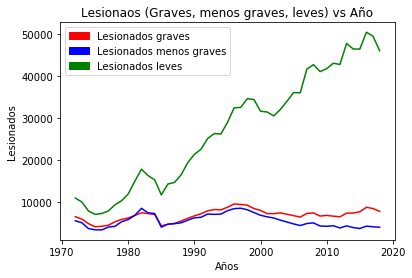

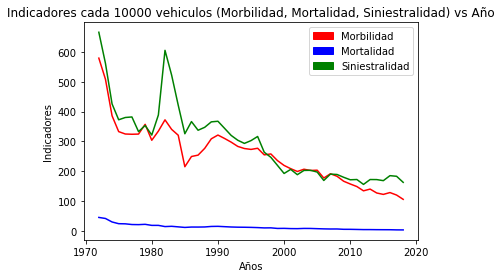

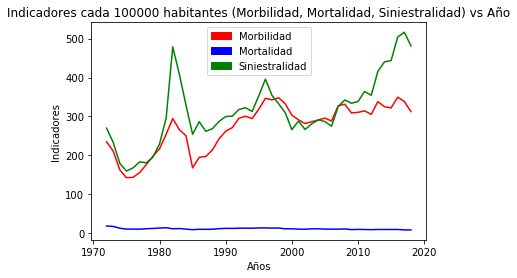

In [6]:
#notemos que en algunos casos tiene más sentido graficar varios graficos en uno como los es el caso de lesionados (graves, menos grave, leves), indicadaros cada 10000 vehiculos (siniestrabilidad,mortalidad,morbilidad), indicadores cada 10000 habitantes (siniestralidad,mortabilidad, morbilidad).

#Lesionados(graves, menos graves, leves)

plt.plot(X,sinestrialidad['Lesionados_graves '].tolist(),color='r')
plt.plot(X,sinestrialidad['Lesionados_menos_graves '].tolist(),color='b')
plt.plot(X,sinestrialidad['Lesionados_leves '].tolist(),color='g')
plt.title('Lesionaos (Graves, menos graves, leves) vs Año')
red_patch = mpatches.Patch(color='red', label='Lesionados graves')
blue_patch = mpatches.Patch(color='blue', label='Lesionados menos graves')
green_patch = mpatches.Patch(color='green', label='Lesionados leves')
plt.legend(handles=[red_patch,blue_patch,green_patch])
plt.xlabel('Años')
plt.ylabel('Lesionados')
plt.show()

#Indicadores cada 10000 vehiculos
plt.plot(X,sinestrialidad['Indicadores_cada_10000_vehículos_Morbilidad'].tolist(),color='r')
plt.plot(X,sinestrialidad['Indicadores_cada_10000_vehículos_Mortalidad '].tolist(),color='b')
plt.plot(X,sinestrialidad['Indicadores_cada_10000_vehículos_Siniestralidad '].tolist(),color='g')
plt.title('Indicadores cada 10000 vehiculos (Morbilidad, Mortalidad, Siniestralidad) vs Año')
red_patch = mpatches.Patch(color='red', label='Morbilidad')
blue_patch = mpatches.Patch(color='blue', label='Mortalidad')
green_patch = mpatches.Patch(color='green', label='Siniestralidad')
plt.legend(handles=[red_patch,blue_patch,green_patch])
plt.xlabel('Años')
plt.ylabel('Indicadores')
plt.show()

#Indicadores cada 10000 personas

plt.plot(X,sinestrialidad['Indicadores_cada_100000_habitantes_Morbilidad'].tolist(),color='r')
plt.plot(X,sinestrialidad['Indicadores_cada_100000_habitantes_Mortalidad'].tolist(),color='b')
plt.plot(X,sinestrialidad['Indicadores_cada_100000_habitantes_Siniestralidad '].tolist(),color='g')
plt.title('Indicadores cada 100000 habitantes (Morbilidad, Mortalidad, Siniestralidad) vs Año')
red_patch = mpatches.Patch(color='red', label='Morbilidad')
blue_patch = mpatches.Patch(color='blue', label='Mortalidad')
green_patch = mpatches.Patch(color='green', label='Siniestralidad')
plt.legend(handles=[red_patch,blue_patch,green_patch])
plt.xlabel('Años')
plt.ylabel('Indicadores')
plt.show()



/home/daniela/miniconda3/envs/mat281/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


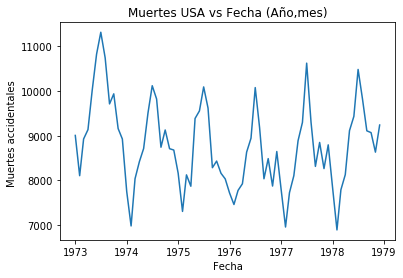

In [7]:
#Ahora graficaremos para deaths
plt.plot(accidental_deaths['date'],accidental_deaths['accidental_deaths'].tolist())
plt.title('Muertes USA vs Fecha (Año,mes)')
plt.xlabel('Fecha')
plt.ylabel('Muertes accidentales ')
plt.show()


# **Previo**

Primero haremos un analisis previo, prediciendo a simple vista lo que apreciamos respecto a la tendencia, estacionalidad

## Tendecia

#### **Siniestros Chile**
- Siniestros vs año : tendencia al alza
- Fallecidos vs año : no se observa tendencia clara
- Lesionados graves vs año : tendencia horizontal
- Lesionados menos graves vs año : tendencia horizontal
- Lesionados leves vs año : tendencia al alza
- Total lesionados  vs año : tendencia al alza
- Total victimas vs año : tendencia al alza
- Tasa motorización vs año : tendencia a la baja
- Vehiculos cada 100 habitantes vs año : tendencia al alza
- Indicadores cada 10000 vehiculos: Siniestralidad vs año : tendencia a la baja
- Indicadores cada 10000 vehiculos: Mortalidad vs año : tendencia horizontal
- Indicadores cada 10000 vehiculos: Morbilidad vs año : tendencia a la baja
- Indicadores cada 100000 habitantes: Siniestralidad vs año : tendencia al alza
- Indicadores cada 100000 habitantes: Mortalidad vs año : tendencia horizontal
- Indicadores cada 100000 habitantes: Morbilidad vs año : tendencia al alza
- Fallecidos cada 100 siniestros vs año : tendencia a la baja
- Siniestros por cada Fallecidos vs año : tendencia al alza

#### **Muertes accidentales USA**
- Muertes vs mes/año : tendencia constante

### Estacionalidad

#### **Siniestros Chile** : No se aprecia estacionalidad
- Siniestros vs año 
- Fallecidos vs año 
- Lesionados graves vs año 
- Lesionados menos graves vs año 
- Lesionados leves vs año 
- Total lesionados  vs año 
- Total victimas vs año 
- Tasa motorización vs año 
- Vehiculos cada 100 habitantes vs año 
- Indicadores cada 10000 vehiculos: Siniestralidad vs año 
- Indicadores cada 10000 vehiculos: Mortalidad vs año 
- Indicadores cada 10000 vehiculos: Morbilidad vs año 
- Indicadores cada 100000 habitantes: Siniestralidad vs año 
- Indicadores cada 100000 habitantes: Mortalidad vs año 
- Indicadores cada 100000 habitantes: Morbilidad vs año 
- Fallecidos cada 100 siniestros vs año 
- Siniestros por cada Fallecidos vs año 

#### **Muertes accidentales USA**
- Muertes vs mes/año : se aprecia estacionalidad, a mitad de año hay un un amuento claro en las muertes, mientras que que en los meses de fin/principio de año hay una baja de muertes

### **Luego aplicaremos el Método S1 de "Tendencia Pequeña" para el modelo clásico de descomposición, esto lo podemos hacer ya que el tamaño del dataset es pequeño y además el por el grafico de la serie de tiempo se puede apreciar que esta aprecia una tendencia constante** 

## Metodo Clásico
Se tiene X_t=T_t+S_t+N_t

- X_t es la serie de tiempo
- T_t es la compononente de tendencia
- S_t es la componente estacional de periodo d
- N_t es la componente residual o de ruido aleatorio

Se cumple que

- E(N_t)=0
- S_{t+f}=S_t
- \sum_{j=1}^d S_j=0


## **S_1** 'tendencia pequeña'

In [8]:
def tendencia(X,Y):
    Tt=[]
    meses=list(np.arange(1,13))
    años=[]
    for i in range(0,len(X)):
        años.append(X[i].year)
    años=list(set(años))
    index_años=list(np.arange(1,len(list(set(años)))+1))
    #print(meses,'\n',años,'\n',index_años,'\n')
    for a in años:
        sum=0
        for i in range(0,len(X)):
            if X[i].year == a:
                sum+=Y[i]
        Tt.append(sum/12)
    #print(Tt)
    return Tt

In [9]:
tend=tendencia(accidental_deaths['date'],accidental_deaths['accidental_deaths'].tolist())
print(tend)

[9651.75, 8718.5, 8585.833333333334, 8396.75, 8576.833333333334, 8796.75]


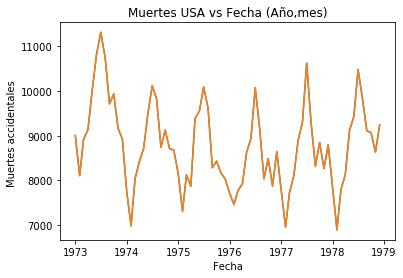

In [10]:
plt.plot(accidental_deaths['date'],accidental_deaths['accidental_deaths'].tolist())
plt.title('Muertes USA vs Fecha (Año,mes)')
plt.xlabel('Fecha')
plt.ylabel('Muertes accidentales ')
plt.plot(accidental_deaths['date'],accidental_deaths['accidental_deaths'].tolist())
plt.show()

In [11]:
def  estacionalidad(X,Y):
    St=[]
    meses=list(np.arange(1,13))
    años=[]
    for i in range(0,len(X)):
        años.append(X[i].year)
    años=list(set(años))
    for m in meses:
        suma=0
        for i in range(0,len(X)):
            if X[i].month== m:
                #años=[3]
                suma+=Y[i]-tendencia(X,Y)[X[i].year-años[0]]
        St.append(suma/len(años))
    #print(St)
    return St

In [12]:
estacional=estacionalidad(accidental_deaths['date'],accidental_deaths['accidental_deaths'].tolist())
print(estacional)

[-743.7361111111113, -1503.902777777778, -723.9027777777779, -522.9027777777779, 338.4305555555554, 807.5972222222221, 1665.097222222222, 961.4305555555553, -87.40277777777798, 196.93055555555534, -320.5694444444446, -67.06944444444464]


In [13]:
def ruido(X,Y):
    Nt=[]
    meses=list(np.arange(1,13))
    años=[]
    for i in range(0,len(X)):
        años.append(X[i].year)
    años=list(set(años))
    for i in range(0,len(X)):
        Nt.append(Y[i]-tendencia(X,Y)[X[i].year-años[0]]-estacionalidad(X,Y)[X[i].month-1])
    return Nt
    

In [14]:
noise=ruido(accidental_deaths['date'],accidental_deaths['accidental_deaths'].tolist())
print(noise)

[98.98611111111131, -41.847222222221944, 0.152777777777942, 8.152777777777942, 26.819444444444628, 366.65277777777794, 0.15277777777805568, 130.81944444444468, 148.652777777778, 89.31944444444466, -170.18055555555537, -657.6805555555553, -224.7638888888887, -233.59722222222194, 43.40277777777794, 226.40277777777794, -342.9305555555554, -14.097222222222058, -263.59722222222194, 143.06944444444468, 111.90277777777798, 213.56944444444466, 312.0694444444446, 28.569444444444642, 319.9027777777774, 224.06944444444412, 262.069444444444, -192.930555555556, 462.7361111111107, 162.569444444444, -157.93055555555588, 72.73611111111074, -213.43055555555594, -349.76388888888926, -105.26388888888931, -484.7638888888893, 63.98611111111131, 568.152777777778, 103.15277777777794, 51.15277777777794, -101.18055555555537, -259.34722222222206, 16.152777777778056, -179.18055555555532, -272.347222222222, -105.68055555555534, -202.18055555555537, 317.3194444444446, -41.097222222222626, -115.93055555555588, -126

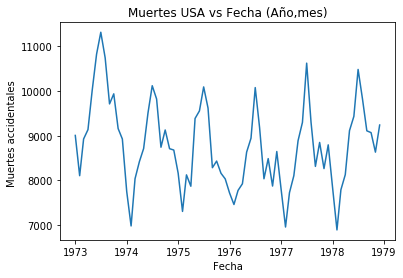

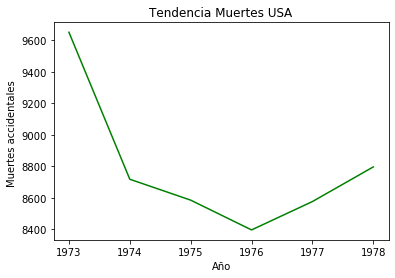

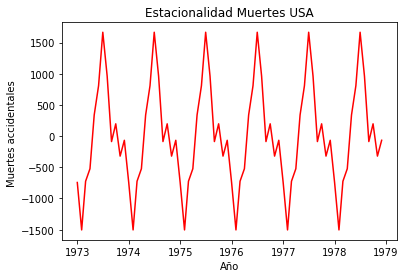

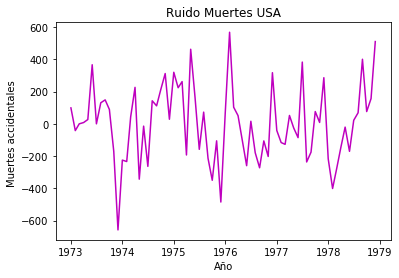

In [27]:
#Muertes vs Fecha
################
plt.plot(accidental_deaths['date'],accidental_deaths['accidental_deaths'].tolist())
plt.title('Muertes USA vs Fecha (Año,mes)')
plt.xlabel('Fecha')
plt.ylabel('Muertes accidentales ')
plt.show()



#Tendencia
#############
#años
años=[] 
for i in accidental_deaths['date']:
    años.append(i.year)

plt.plot(list(set(años)),tend,color='green')
plt.title('Tendencia Muertes USA')
plt.xlabel('Año')
plt.ylabel('Muertes accidentales ')
plt.show()

#Estacionalidad
#############

plt.plot(accidental_deaths['date'],estacional*6,color='red')
plt.title('Estacionalidad Muertes USA')
plt.xlabel('Año')
plt.ylabel('Muertes accidentales ')
plt.show()

#Ruido
##################

plt.plot(accidental_deaths['date'],noise,color='m')
plt.title('Ruido Muertes USA')
plt.xlabel('Año')
plt.ylabel('Muertes accidentales ')
plt.show()

### **Por otra parte tenemos que el dataset sinestralidad no tiene componente estacional ya que registra los datos por años**

## Metodo sin componente estacional
Se tiene X_t=T_t+N_t

- X_t es la serie de tiempo
- T_t es la compononente de tendencia
- N_t es la componente residual o de ruido aleatorio


### **Luego aplicaremos el Método S2 de "Promedios móviles" para el metodo sin componente estacional.**


In [16]:
def promedios_moviles(X,Y,q):
    #utilizando el filto simetrico de 2q+1 puntos
    W_t=[]
    for i in range(q+1,len(Y)-q+1):
        suma=0
        for j in range(-q,q+1):
            suma+=Y[i+j-1]
        W_t.append(suma/(2*q+1))
    return W_t

In [17]:
q=3
Y_tendencia=promedios_moviles(sinestrialidad['Año'],sinestrialidad['Fallecidos'],q)
print(Y_tendencia)

[1313.0, 1244.0, 1203.2857142857142, 1243.7142857142858, 1275.142857142857, 1315.7142857142858, 1335.5714285714287, 1313.0, 1296.142857142857, 1262.4285714285713, 1219.0, 1246.2857142857142, 1278.2857142857142, 1334.2857142857142, 1427.2857142857142, 1508.5714285714287, 1589.142857142857, 1680.857142857143, 1746.5714285714287, 1788.857142857143, 1839.857142857143, 1833.4285714285713, 1824.5714285714287, 1796.0, 1747.2857142857142, 1715.5714285714287, 1697.5714285714287, 1650.0, 1649.5714285714287, 1642.0, 1673.4285714285713, 1667.5714285714287, 1652.142857142857, 1625.857142857143, 1611.142857142857, 1607.0, 1604.857142857143, 1585.4285714285713, 1609.2857142857142, 1593.2857142857142, 1583.857142857143]


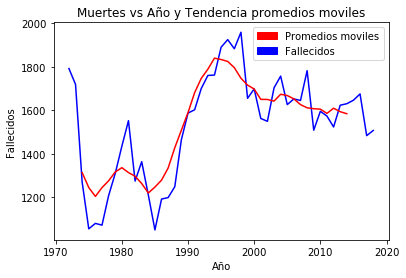

In [19]:
plt.plot(X,sinestrialidad['Fallecidos'],color='blue')
plt.title('Muertes vs Año y Tendencia promedios moviles')
plt.xlabel('Año')
plt.ylabel('Fallecidos ')
plt.plot(list(np.arange(q+1,len(X)-q+1)+1970),Y_tendencia,color='red')
blue_patch = mpatches.Patch(color='blue', label='Fallecidos')
red_patch = mpatches.Patch(color='red', label='Promedios moviles')
plt.legend(handles=[red_patch,blue_patch])
plt.show()